<a href="https://colab.research.google.com/github/devinv-MSS/minnano_ai/blob/kamawae-udemy/section_4/external_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 外部データの導入
外部から、花のサイズのデータを読み込みます。  
単一ニューロンを使って、花の分類を行いましょう。  

In [1]:
!pip install icecream

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from icecream import ic

## ● Iris datasetの導入
scikit-learnというライブラリからIris datasetを導入します。  
Iris datasetは、150個、3品種のIrisの花のサイズからなるデータセットです。  
今回は、この中の2品種、SetosaとVersicolorのがく（Sepal）の長さと幅を使います。  

ic| iris_data: array([[5.1, 3.5, 1.4, 0.2],
                      [4.9, 3. , 1.4, 0.2],
                      [4.7, 3.2, 1.3, 0.2],
                      [4.6, 3.1, 1.5, 0.2],
                      [5. , 3.6, 1.4, 0.2],
                      [5.4, 3.9, 1.7, 0.4],
                      [4.6, 3.4, 1.4, 0.3],
                      [5. , 3.4, 1.5, 0.2],
                      [4.4, 2.9, 1.4, 0.2],
                      [4.9, 3.1, 1.5, 0.1],
                      [5.4, 3.7, 1.5, 0.2],
                      [4.8, 3.4, 1.6, 0.2],
                      [4.8, 3. , 1.4, 0.1],
                      [4.3, 3. , 1.1, 0.1],
                      [5.8, 4. , 1.2, 0.2],
                      [5.7, 4.4, 1.5, 0.4],
                      [5.4, 3.9, 1.3, 0.4],
                      [5.1, 3.5, 1.4, 0.3],
                      [5.7, 3.8, 1.7, 0.3],
                      [5.1, 3.8, 1.5, 0.3],
                      [5.4, 3.4, 1.7, 0.2],
                      [5.1, 3.7, 1.5, 0.4],
                      [4.6, 3.6,

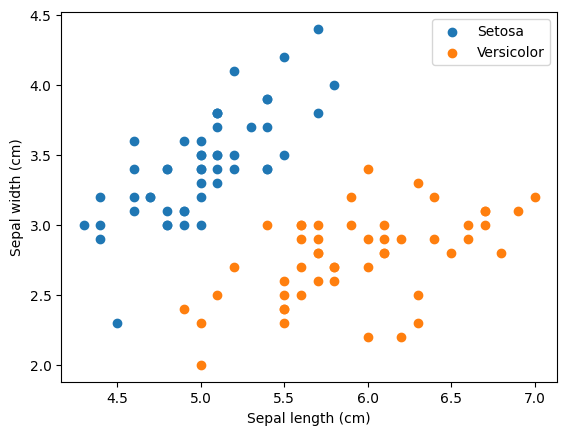

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Irisデータの読み込み
iris = datasets.load_iris()

# 各花のサイズ
iris_data = iris.data
ic(iris_data)
ic(iris_data.shape)  # 形状

# 散布図で表示
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")  # Sepal lengthとSepal width
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")  # Sepal lengthとSepal width
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

In [ ]:
# コードの練習用


## ● 単一ニューロンによる分類
単一ニューロンからなるニューラルネットワークを使って、Irisの花を2品種に分類します。  
ニューラルネットワークの入力は偏りが無い方が望ましいため、花のサイズから平均値を引いて入力とします。  
分類結果を散布図で表示しますが、比較のために元の分類も並べて表示します。  

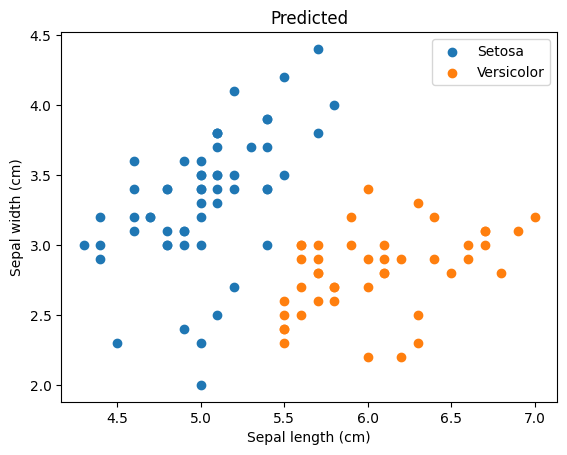

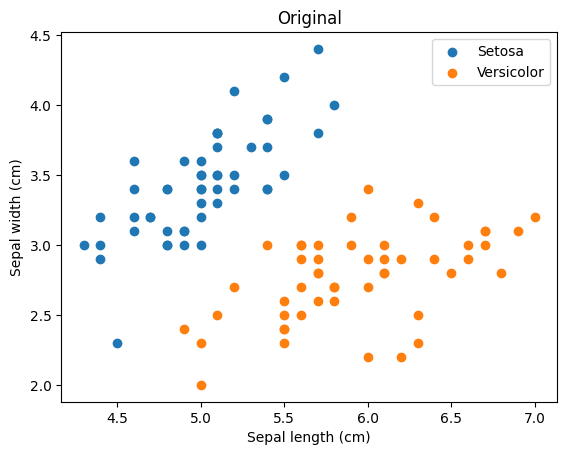

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy() # SetosaとVersicolor、Sepal length: copy()で元データが変更されない
sw_data = iris_data[:100, 1].copy() # SetosaとVersicolor、Sepal width

# 平均値を0に
sl_ave = np.average(sl_data)  # 平均値
sl_data -= sl_ave  # 平均値を引く
sw_ave = np.average(sw_data)
sw_data -= sw_ave

# 入力をリストに格納
input_data = []
for i in range(100):  # iには0から99までが入る
    input_data.append([sl_data[i], sw_data[i]])

# シグモイド関数
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):  # 初期設定
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self):  # 初期設定
        self.neuron = Neuron()  #ニューロンのインスタンス
        self.w = [0.5, -0.2]
        self.bias = 0.0

    def commit(self, input_data):  # 実行
        self.neuron.reset()

        self.neuron.set_input(input_data[0] * self.w[0])
        self.neuron.set_input(input_data[1] * self.w[1])
        self.neuron.set_input(self.bias)
        return self.neuron.get_output()

# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

# 実行
st_predicted = [[], []]  # Setosa
vc_predicted = [[], []]  # Versicolor
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0]+sl_ave)
        st_predicted[1].append(data[1]+sw_ave)
    else:
        vc_predicted[0].append(data[0]+sl_ave)
        vc_predicted[1].append(data[1]+sw_ave)

# 分類結果を散布図で表示
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()

# 比較用に元の分類を散布図で表示
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Original")
plt.show()

ic| np.average(sl_data): 5.471000000000001
ic| np.average(sl_data): -9.85878045867139e-16
ic| self.w: [0.5, -0.2], self.bias: 0.09


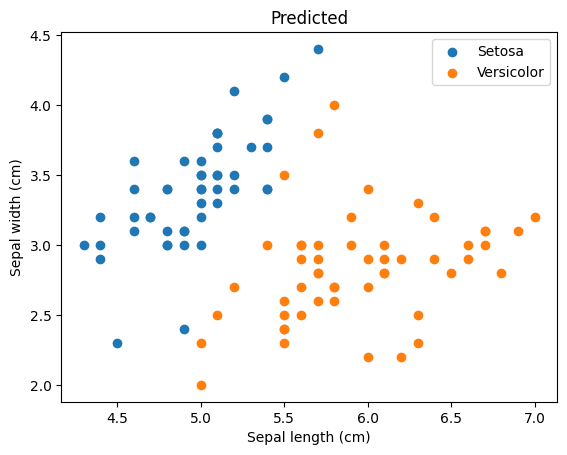

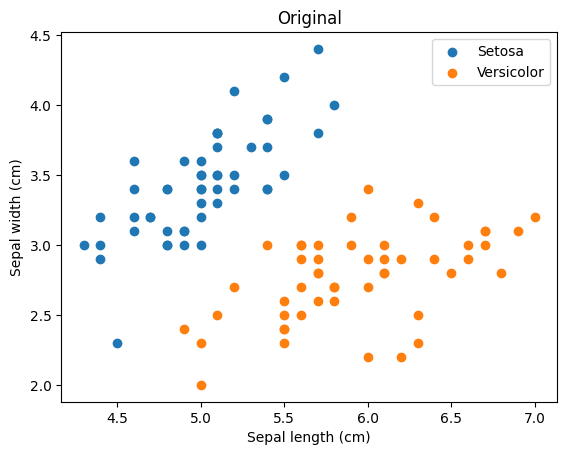

In [17]:
# コードの練習用
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy() # SetosaとVersicolor、Sepal length: copy()で元データが変更されない
sw_data = iris_data[:100, 1].copy() # SetosaとVersicolor、Sepal width

# 平均値を0に
sl_ave = np.average(sl_data)  # 平均値
ic(np.average(sl_data))
sl_data -= sl_ave  # 平均値を引く
sw_ave = np.average(sw_data)
sw_data -= sw_ave
ic(np.average(sl_data))

# 入力をリストに格納
input_data = []
for i in range(100):  # iには0から99までが入る
    input_data.append([sl_data[i], sw_data[i]])

# シグモイド関数
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):  # 初期設定
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self):  # 初期設定
        self.neuron = Neuron()  #ニューロンのインスタンス
        self.w = [0.5, -0.2]
        self.bias = 0.09
        ic(self.w,self.bias)

    def commit(self, input_data):  # 実行
        self.neuron.reset()

        self.neuron.set_input(input_data[0] * self.w[0])
        self.neuron.set_input(input_data[1] * self.w[1])
        self.neuron.set_input(self.bias)
        return self.neuron.get_output()

# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

# 実行
st_predicted = [[], []]  # Setosa
vc_predicted = [[], []]  # Versicolor
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0]+sl_ave)
        st_predicted[1].append(data[1]+sw_ave)
    else:
        vc_predicted[0].append(data[0]+sl_ave)
        vc_predicted[1].append(data[1]+sw_ave)

# 分類結果を散布図で表示
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()

# 比較用に元の分類を散布図で表示
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Original")
plt.show()